# <a> Principal Component Analysis e Clusterização </a>

Principal Component Analysis (PCA) é uma técnica estatística muito utilizada para simplificar a complexidade em um determinado conjunto de dados, de forma a garantir maior interpretabilidade do estudo. A necessidade de utilização dessas técnicas surge quando o conjunto de dados analisado é relativamente grande, dificultando a visualização da relação entre as features. Além disso, também é útil aplicar técnicas de PCA em situações que a utilização de modelos preditivos se beneficia de um menor número de variáveis. 

Outro ponto interessante é que as técnicas de PCA também podem ser empregadas conjuntamente com técnicas de clusterização. Isso ocorre pois a partir da construção de aglomerados, é possível reconhecer suas características por meio da redução do número de features do DataFrame, gerando, dessa forma, resultados mais impactantes numa análise de clusterização.

# <a> Visão Geral - PCA para Segmentação de Clientes 

O presente projeto consiste na construção de uma segmentação de clientes com o objetivo de garantir maior eficiência no lançamento de um produto no mercado automotivo.

Nesse sentido, é importante executar pesquisas de mercado com os possíveis consumidores tendo em vista a análise de alguns fatores, tais como as preferências dos compradores, além de determinados dados demográficos. Dado que o produto em questão é uma microvan, o presente projeto tem por objetivos:

- Identificar qual é o segmento alvo para esse veículo
- Compreender as características de tal segmento
- Reconhecer os consumidores com maior propensão à compra.

Para alcançar tais objetivos, é necessário realizar uma coleta de dados abrangente, incluindo pesquisas primárias, grupos focais direcionados e pesquisas em larga escala. A análise desses dados demográficos permite a identificação do perfil dos potenciais consumidores. Além disso, foi realizada uma seleção criteriosa de atributos relevantes, buscando capturar as dimensões-chave que caracterizam os potenciais compradores da microvan.

Após a seleção dos atributos, foi apresentado o projeto da microvan aos consumidores, obtendo-se notas de avaliação para analisar a aceitação do conceito. Nesse sentido, será aplicada a técnica de Principal Component Analysis (PCA) para reduzir a dimensionalidade das features da base de dados, agrupando aquelas com variância similar. A utilização da Análise de Componentes Principais é interessante pois permite trazer mais interpretabilidade à análise. Após isso, a utilização de métodos de clusterização permitirá a formação de grupos homogêneos de consumidores, facilitando a identificação de perfis de interesse.

Ao avaliar os resultados da redução de dimensionalidade em termos dos interesses dos consumidores, será possível identificar o segmento alvo para a microvan. Este projeto destaca-se por sua aplicabilidade em diversos setores, evidenciando a utilidade da análise de questionários e redução de dimensionalidade destes a partir de técnicas de análise de componentes principais para empresas que buscam compreender as preferências de seus clientes.

* O estudo de caso analisado neste projeto está disponível no livro "Modern Marketing Research: Concepts, Methods, and Cases"

Este projeto foi construído durante a formação da "Let's Data" - Jornada Cientista de Dados - https://www.letsdata.ai

In [1]:
# Importando bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA

# Setando configurações para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando configuração para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Mostrando números com duas casas decimais

In [2]:
# Lendo os dados
df = pd.read_csv('./data/microvan.csv')

# Visualizando
df.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [3]:
# Visualizando todas as colunas 
df.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

Levando em consideração que o nome das features não é muito mnemônico, é necessário identificar cada variável por meio de um dicionário de dados.

No entanto, como a feature 'subjnumb', que representea o "Subject Number" serve apenas para identificar cada indivíduo, é possível passá-la como sendo o índice do DataFrame.

In [4]:
# Passando 'subjnumb' como indice do DataFrame
df = df.set_index("subjnumb")

# Visualizando
df.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


## <a> Dicionário de Dados </a>

Como há variáveis com desrições longas, é inviável dispor a visualização da tabela do dicionário de dados. No entanto, vamos criar um objeto 'dict' para acessar a descrição de cada variável. 

* A Imagem do dicionário de dados pode ser acessada em data -> data dictionary.

In [5]:
# Criando Dicionário de Dados
dicionario_dados = dict()

# Preenchendo o dicionário
dicionario_dados['mvliking'] = 'Quanto o cliente gostou do conceito da microvan.'
dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos e seus amigos.'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes.'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [6]:
# Testando aplicabilidade do dicionário
dicionario_dados['female'], dicionario_dados['age'], dicionario_dados['income']

('Se o entrevistado é ou não uma mulher',
 'Idade do entrevistado em anos',
 'Renda familiar anual em milhares de dólares')

### <a> Informações Iniciais </a>

In [7]:
# Visualizando dimensões
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas")

O DataFrame possui 400 linhas e 38 colunas


In [8]:
# Analisando os tipos de dados de cada feature
df.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [9]:
# Analisando outras informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

Todas as colunas estão em formato inteiro, pois armazenam informações relativas à nota que cada entrevistado deu para cada um dos critérios, e, quando se tratando de variáveis demográficas, também representam valores inteiros (já que são variáveis métricas). 

## <a> Estatística Descritiva e EDA</a>

Essa etapa é fundamental para entender a base de dados utilizada. Aqui serão analisadas separatrizes, distribuições, medidas de tendência central, medidas de dispersão e mais.

In [10]:
# Analisando estatisticas descritivas do DataFrame
df.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


Como era de se esperar, as variáveis advindas do questionário estão compreendidas no intervalo de 1 a 9. O valor dessas variáveis corresponde a nota que o entrevistado deu para cada um dos atributos do questionário. 

Já no que diz respeito às variáveis demográficas, observa-se diferenças no intervalo de valores em razão de sua natureza.

In [11]:
# Criando função de histograma para visualização gráfica
def histograma(dados, var, legenda):
    """
    Gera um histograma para a variável especificada no dataframe fornecido.

    Parâmetros:
    -> dados (DataFrame): O dataframe contendo os dados a serem utilizados.
    -> var (str): O nome da variável para a qual deseja-se gerar o histograma.
    -> legenda (tuple): Uma tupla contendo duas strings - a primeira para a legenda do eixo x e a segunda para o título do gráfico
    """
    
    sns.set_style("white") # Setando estilo do seaborn 
    plt.figure(figsize=(8,4)) # Definindo tamanho do objeto figure
    sns.histplot(data = dados, x = f'{var}', color = '#800080') # Plotando o gráfico
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("Quantidade", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    
    # Colocando titulo
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold')
    
    # Mostrando 
    plt.show()

In [12]:
# Criando função para visualização de countplots
def countplot(dados, var, cat, legenda, map):
    """
    Gera um countplot para a variável especificada a partir do dataframe fornecido.

    Parâmetros:
    -> dados (DataFrame): O dataframe contendo os dados a serem utilizados.
    -> var (str): O nome da variável para a qual deseja-se gerar o countplot.
    -> cat (str): O nome da variável de categoria (hue) para diferenciação no countplot.
    -> legenda (tuple): Uma tupla contendo duas strings - a primeira para a legenda do eixo x e a segunda para o título do gráfico.
    -> map (dict): Um dicionário para mapeamento contendo as chaves e o valor para troca. Ex: {0: Homens, 1: Mulheres}
    """
    # Definindo cores para a paleta
    color = ['#00FFFF', '#800080'] # Cores ciano e roxo 
    sns.set_style("white") # Setando estilo do seaborn
    plt.figure(figsize=(8,6)) # Definindo tamanho do objeto figure    
    sns.countplot(dados, x = f"{var}", palette = color, hue = f"{cat}", legend = False) # Plotando gráfico
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("[]", color = 'grey', fontsize = 0, labelpad = 15) # Tirando legenda do eixo y
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold') # Colocando título
    chaves, valores = zip(*map.items()) # Criando tupla de chave:valor para mapeamento 
    plt.xticks(chaves, valores) # Mapeando valores para eixo x
    # Mostrando
    plt.show()

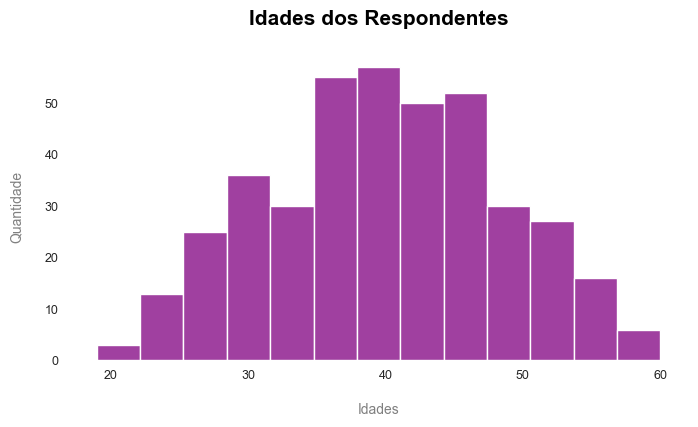

In [13]:
# Utilizando a função para analisar a distribuição de idades entre os respondentes
histograma(dados = df, var = 'age', legenda = ("Idades", "Idades dos Respondentes"))

In [14]:
# Visualizando a moda dessa distribuiçao
df['age'].mode()

0    46
Name: age, dtype: int64

A partir do histograma acima fica evidente a concentração de clientes na faixa etária de 30 a 46 anos, representando o público alvo da empresa.

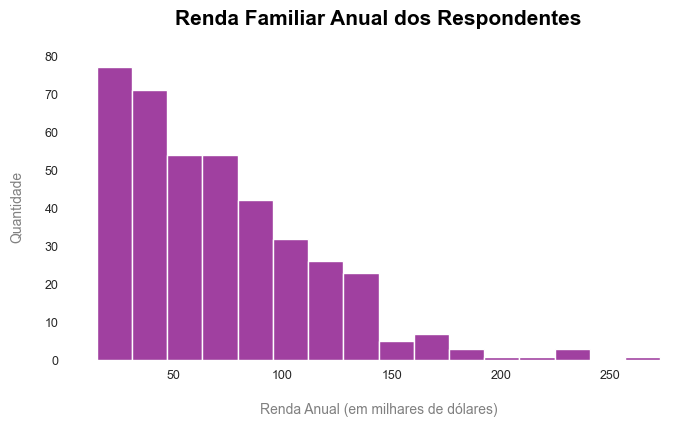

In [15]:
# Analisando a distribuição de renda dos respondentes
histograma(dados = df, var = 'income', legenda = ("Renda Anual (em milhares de dólares)", "Renda Familiar Anual dos Respondentes"))

In [16]:
print(f"{((len(df.loc[df['income'] < 100, :])/len(df)) * 100)} dos respondentes possui renda familiar anual inferior a 100 mil dólares")

76.5 dos respondentes possui renda familiar anual inferior a 100 mil dólares


É possível perceber que a maioria dos respondentes possui renda familiar anual concentrada na faixa de 30 a 100 mil dólares.

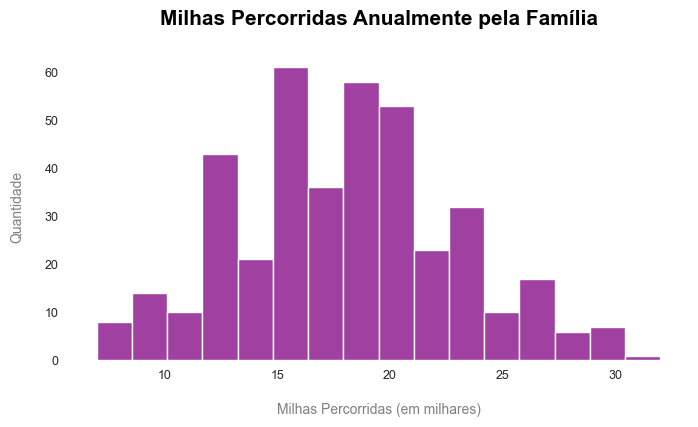

In [17]:
#dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
histograma(dados = df, var = 'miles', legenda = ("Milhas Percorridas (em milhares)", "Milhas Percorridas Anualmente pela Família"))

É possível perceber que apenas pela visualização do histograma não é identificar um padrão nas milhas percorridas pelas famílias dos respondentes.

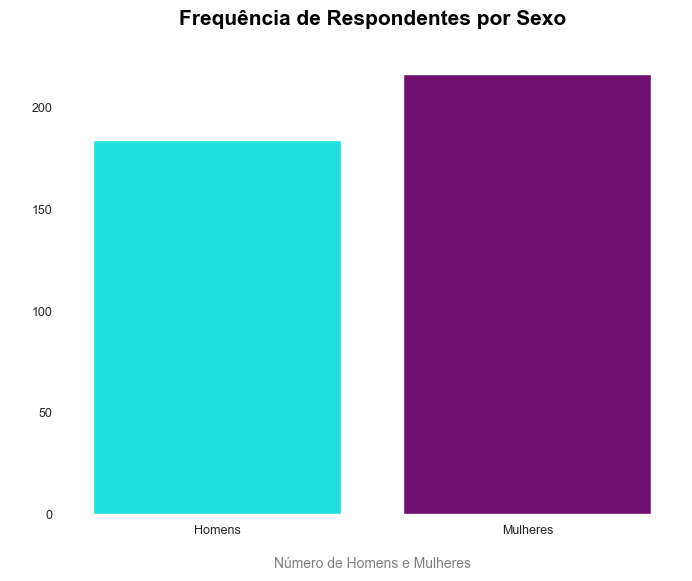

In [18]:
# Utilizando função para análise gráfica (countplot)
countplot(df, 'female', 'female', ("Número de Homens e Mulheres", "Frequência de Respondentes por Sexo"), {0: "Homens", 1: "Mulheres"})

O countplot revela uma predominância de mulheres em comparação com homens entre os respondentes, indicando uma proporção maior de participantes do sexo feminino na amostra.




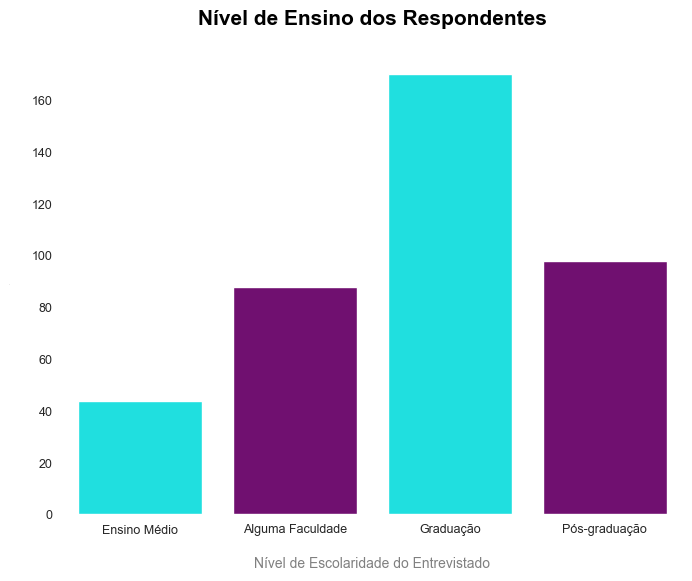

In [19]:
# Utilizando filtro de warnings
warnings.simplefilter("ignore")

# Utilizando função countplot para análise gráfica 
countplot(df, 'educ', 'educ', ("Nível de Escolaridade do Entrevistado", "Nível de Ensino dos Respondentes"),
          {0: "Ensino Médio", 1: "Alguma Faculdade", 2: "Graduação", 3: "Pós-graduação"})

# Obs: Para que os valores fossem "fitados" da forma correta para cada barra do countplot, o dicionário começou da chave 0 e não 1.

O gráfico revela que a maioria dos respondentes possui ensino superior, indicando um perfil educacional mais elevado na amostra. É importante levar tais características em consideração tendo como objetivo auxiliar a aderência ao produto pelos consumidores.

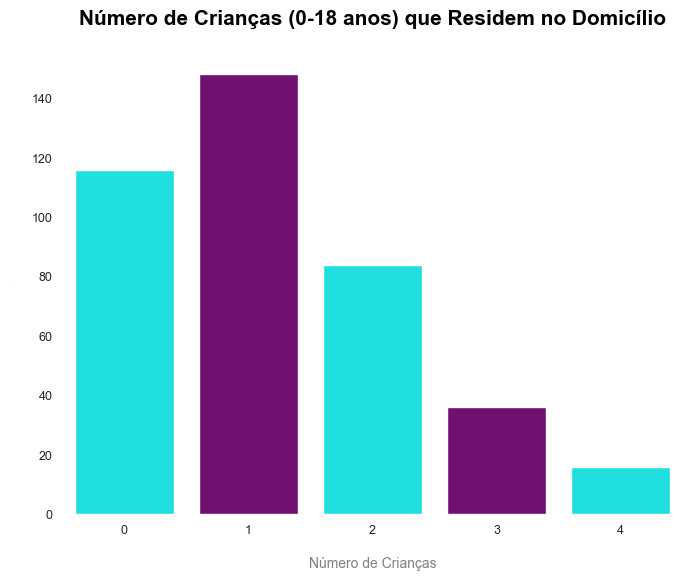

In [20]:
# Utilizando função countplot para análise gráfica
countplot(df, 'numkids', 'numkids', ("Número de Crianças", "Número de Crianças (0-18 anos) que Residem no Domicílio"), 
         {0: "0", 1: "1", 2: "2", 3: "3", 4: "4"})

A maioria dos respondentes possui dependentes, o que torna possível o desejo por um carro mais espaçoso. 

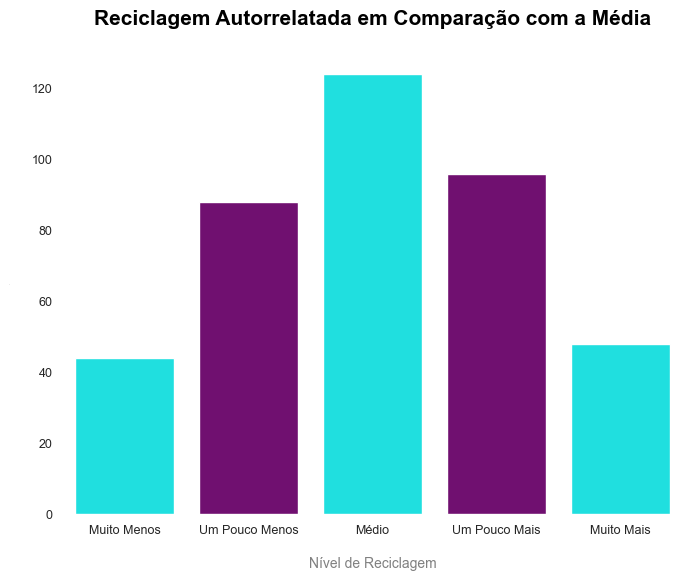

In [21]:
# Utilizando função countplot para análise gráfica 
countplot(df, 'recycle', 'recycle', ("Nível de Reciclagem", "Reciclagem Autorrelatada em Comparação com a Média"), 
         {0: "Muito Menos", 1: "Um Pouco Menos", 2: "Médio", 3: "Um Pouco Mais", 4: "Muito Mais"})

Como é possível perceber, o nível de reciclagem entre os respondentes é bem dividido entre abaixo e acima da média, com uma leve vantagem para essa última categoria.

## <a> Redução de Dimensionalidade</a>

Primeiramente vamos determinar o melhor número de componentes principais que serão utilizados. É desejado que hajam poucos componentes e estes expliquem grande parte da variância dos dados.

A redução de dimensionalidade será feita com base nas questões respondidas pelos entrevistados, e não com base nas features referentes ao perfil demográfico de cada respondente. Nesse sentido, tais colunas serão removidas antes da escolha do melhor número de componentes. 

In [22]:
# Removendo features de caráter demográfico (e, também, a feature mvliking)
features_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

# Testando número de componentes e a variância que eles explicam
for numero_componentes in range(1,10):
    # Classe PCA recebendo numero de componentes de acordo com elementos do range, havendo ajuste no DataFrame 'df' excluindo-se features demograficas
    pca = PCA(n_components = numero_componentes, random_state = 42).fit(df.drop(features_demograficas, axis = 1))
    print(f"{numero_componentes} componentes com variância total explicada de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}")

1 componentes com variância total explicada de 0.2769670987967247: [0.2769671]
2 componentes com variância total explicada de 0.444576775001748: [0.2769671  0.16760968]
3 componentes com variância total explicada de 0.5459459552274876: [0.2769671  0.16760968 0.10136918]
4 componentes com variância total explicada de 0.6342464490894247: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância total explicada de 0.6949209280291697: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância total explicada de 0.7163695796236543: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância total explicada de 0.7356422840632018: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância total explicada de 0.753873788437881: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância total explicada de 0.7715

Levando em consideração que de 4 componentes para 5 ocorreu um incremento na variância total explicada de cerca de 6% e, de 5 componentes para 6, houve um aumento na variância total explicada de aproximadamente 2%, é possível perceber que o melhor numero de componentes principais foi 5. 

Dessa forma, vamos ajustar o objeto 'pca' com apenas 5 componentes.

In [23]:
# Ajustando o objeto pca com 5 componentes principais
pca = PCA(n_components=5, random_state=42).fit(df.drop(features_demograficas, axis=1))

# Mostrando variância total explicada
print(f"Com a utilização de 5 componentes principais, explica-se {(sum(pca.explained_variance_ratio_) * 100):.2f} da variância total")

Com a utilização de 5 componentes principais, explica-se 69.49 da variância total


## <a> Analisando os Componentes </a>

Como cada componente é formado pelas 30 variáveis originais, é necessário realizar uma análise de cada componente principal a fim de garantir sua interpretabilidade. Dessa forma, será analisada a importância que as variáveis originais apresentam em cada componente. A fim de tornar possível uma interpretação mais clara, serão analisadas as variáveis com maior e menor peso nos componentes.

In [24]:
# Para visualizar a importância de cada variavel original em cada componente, utilizamos o atributo components_
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Esse atributo mostra um array com 5 listas, em que cada uma corresponde a um componente principal. Além disso, cada uma das 5 listas possui 30 elementos, que correspondem a importância das features originais para o componente em questão. 

A fim de visualizar tais valores de uma forma mais clara, é preciso montar um DataFrame:

In [25]:
# Criando DataFrame e suas colunas (a partir da remoção das colunas demograficas do DataFrame original)
componentes_importancia = pd.DataFrame(columns=df.drop(features_demograficas, axis = 1).columns)

# Utilizando um loop for para associar cada linha do DataFrame a um componente principal 
for i in range(len(pca.components_)): # Range de 5 (iterando sobre cada elemento do pca.components_)
    componentes_importancia.loc[i] = pca.components_[i]

# Visualizando o DataFrame com todos os dados devidamente preenchidos
componentes_importancia

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


Para analisar cada componente é interessante selecionar as features originais que tiveram maior influência positiva e negativa.

In [26]:
# Selecionando 3 features que tiveram maior importância no componente principal 5
maiores_indices = [i for i in componentes_importancia.loc[4].nlargest(3).index]

# Mostrando as features
maiores_indices

['pricqual', 'envrminr', 'twoincom']

In [27]:
# Vendo o que essas features representam
for i in maiores_indices:
    print(dicionario_dados[i])

Os preços dos automóveis refletem fortemente a qualidade de produção subjacente
O impacto ambiental dos automóveis é relativamente pequeno
Nossa família acharia difícil subsistir com apenas uma renda


In [28]:
# Selecionando 3 features que tiveram menor importância no componente principal 5
menores_indices = [i for i in componentes_importancia.loc[4].nsmallest(3).index]

# Mostrando as features
menores_indices

['shdcarpl', 'kidtrans', 'kidsbulk']

In [29]:
# Vendo o que essas features representam
for i in menores_indices:
    print(dicionario_dados[i])

Acho que todo mundo deveria pegar carona ou usar transporte público
Precisamos de um carro que ajude a transportar nossos filhos e seus amigos.
Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles


De acordo com a análise feita acima, é possível considerar que o componente principal 5 tem forte influência de famílias que estão dispostas a pagar por carros mais caros (e melhores), além de não se importarem muito com o impacto ambiental dos automóveis. De forma adicional, as famílias representadas no componente 5 não consideram necessário que todos usem transporte público, e provavelmente não possuem filhos pequenos.   

Tendo demonstrado o grande potencial do uso de técnicas de PCA, é importante sistematizar a análise para os outros componentes. Para isso, analisaremos, primeiramente, apenas a feature mais importante e a menos importante para cada componente principal. 

In [30]:
# Criando um loop for para iterar sobre os componentes
for i in range(len(pca.components_)):
    feature_mais_importante = componentes_importancia.columns[componentes_importancia.loc[i].argmax()]
    feature_menos_importante = componentes_importancia.columns[componentes_importancia.loc[i].argmin()]

    # Printando a descrição de cada feature (maior e menor) para cada componente de acordo com o dicionario de dados 
    print(f"Impacto positivo no componente {i+1}: {dicionario_dados[feature_mais_importante]}. Impacto negativo: {dicionario_dados[feature_menos_importante]} \n")

Impacto positivo no componente 1: Temos cuidado com o dinheiro. Impacto negativo: Tentamos tirar o máximo de férias possível 

Impacto positivo no componente 2: Meu próximo carro será um de dois lugares. Impacto negativo: As minivans atuais são simplesmente muito quadradas e grandes. 

Impacto positivo no componente 3: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias. Impacto negativo: Não fazemos viagens com a família 

Impacto positivo no componente 4: O desempenho é muito importante em um carro. Impacto negativo: A segurança do automóvel é muito importante para mim 

Impacto positivo no componente 5: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente. Impacto negativo: Acho que todo mundo deveria pegar carona ou usar transporte público 



De forma adicional, também é possível sistematizar tal análise para as duas features mais importantes e as duas features menos importantes para cada componente principal. 

No entanto, é importante salientar que nem sempre os componentes podem ser interpretados a partir do mesmo número de features mais e menos importantes. Isso ocorre pois algumas vezes a segunda feature mais importante apresenta valor bem inferior a feature mais importante, o que pode comprometer a análise.

In [31]:
# Criando loops para visualização das 2 features mais importantes e menos importantes em cada componente 
for i in range(len(pca.components_)):
    features_mais_importantes = [a for a in componentes_importancia.loc[i].nlargest(2).index]
    features_menos_importantes = [a for a in componentes_importancia.loc[i].nsmallest(2).index]
    
    # Criando strings vazias para armazenar impactos positivos e negativos
    impactos_positivos = ""
    impactos_negativos = ""
    
    # Criando loop for para cada elemento selecionado
    for a in features_mais_importantes:
        impactos_positivos += f" {dicionario_dados[a]}. "
    
    for a in features_menos_importantes:
        impactos_negativos += f" {dicionario_dados[a]}. "
    
    # Printando os resultados para cada categoria (impactos positivos e negativos)
    print(f"Impactos positivos no componente {i+1}:", impactos_positivos)
    print(f"Impactos negativos no componente {i+1}:", impactos_negativos)
    print("\n")

Impactos positivos no componente 1:  Temos cuidado com o dinheiro.  A paixão pelo trabalho é mais importante do que o pagamento. 
Impactos negativos no componente 1:  Tentamos tirar o máximo de férias possível.  Os acessórios realmente tornam o carro mais divertido de dirigir. 


Impactos positivos no componente 2:  Meu próximo carro será um de dois lugares.  Nossa casa está entre as maiores do bairro. 
Impactos negativos no componente 2:  As minivans atuais são simplesmente muito quadradas e grandes..  Gosto mais de SUVs do que de minivans, pois são mais compactos. 


Impactos positivos no componente 3:  Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias.  Precisamos de um carro que ajude a transportar nossos filhos e seus amigos.. 
Impactos negativos no componente 3:  Não fazemos viagens com a família.  O desempenho é muito importante em um carro. 


Impactos positivos no componente 4:  O desempenho é muito importante em um carro.  Precisamos de um c

## <a> Analisando graficamente os pesos das variáveis em cada componente principal </a>

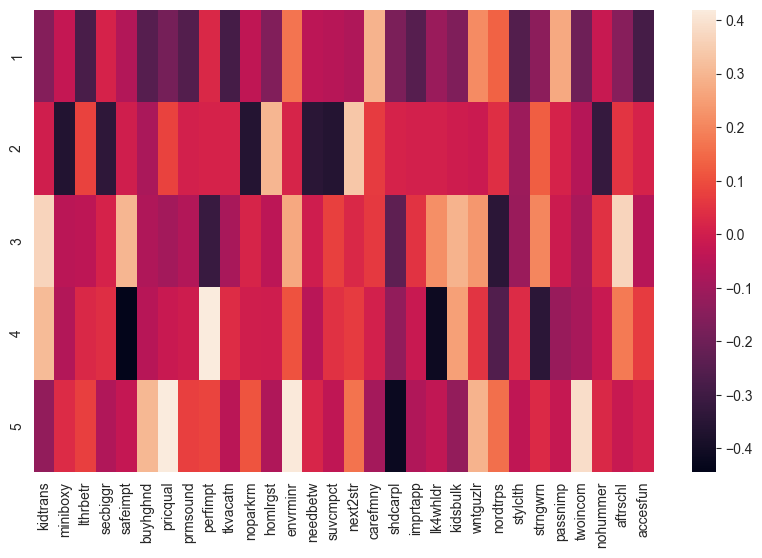

In [32]:
# Plotando heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data = componentes_importancia, yticklabels = componentes_importancia.index+1)
plt.show()

A partir do heatmap é possível observar quais features possuem maior peso negativo e maior peso positivo em cada componente. Isso facilita a análise de cada componente principal.

In [33]:
# Verificando variaveis dos componentes principais
dicionario_dados['pricqual'], dicionario_dados['envrminr'], dicionario_dados['twoincom']

('Os preços dos automóveis refletem fortemente a qualidade de produção subjacente',
 'O impacto ambiental dos automóveis é relativamente pequeno',
 'Nossa família acharia difícil subsistir com apenas uma renda')

As informações acima correspondem à caracterização do componente principal de número 5.

Uma boa estratégia é atribuir nomes mnemônicos aos componentes principais a fim de identificá-los. Além disso, tal ação se demonstra bastante útil para uma posterior análise de clusterização. 

De acordo com os pesos de cada variável, podemos renomear os componentes principais como:

- Componente 1: **Workaholics econômicos!**
- Componente 2: **Queremos carros pequenos!**
- Componente 3: **Família ativa!**
- Componente 4: **Amantes de velocidade!**
- Componente 5: **Preço alto é carro bom!**

Apesar da simplificação dos nomes que caracterizam os componentes principais, é possível classificá-los de acordo com os pesos das variáveis que os compõem, e, por meio dos nomes, fornecer base para uma campanha de marketing mais efetiva. Além disso, entender os componentes faz com que tenhamos noção de quais variáveis tem variabilidade semelhante, o que, em questionários, realmente aproxima aquelas variáveis que são mais similares.

Por fim, é necessário transformar o dataframe original para que sejam representados os 5 componentes principais criados. Neste novo dataframe criado, cada coluna representará um componente principal e cada linha representará o valor daquele indivíduo no que se refere ao componente em questão.

In [34]:
# Criando novo DataFrame
principal_components = pca.transform(df.drop(features_demograficas, axis = 1))
principal_components

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

In [35]:
# Colocando esses dados num Pandas DataFrame
df_pca = pd.DataFrame(data = principal_components)

# Mostrando o DataFrame
df_pca.tail()

,0,1,2,3,4
395,4.75,1.40,-0.84,-1.76,2.21
396,8.47,1.16,-5.78,-2.20,-0.93
397,-6.41,-4.48,-6.66,-0.29,-1.62
398,-3.57,-5.53,0.25,2.61,-1.04
399,4.05,2.46,3.76,-0.49,0.74


A partir dessa transformação e das descrições dadas acima, é possível construir algumas interpretações:

O indivíduo da linha 397 não pertence ao componente 1 (**Workaholics Econômicos**).

O indivíduo da linha 399 pertence ao componente 1 (**Workaholics Econômicos**).

## <a> Segmentação de Clientes </a>

No universo dinâmico dos negócios, compreender as nuances individuais dos clientes é crucial para o sucesso empresarial. Após uma eficiente análise de componentes principais (PCA) que reduziu nosso conjunto de dados de 30 perguntas para 5 componentes principais, avançamos para a segunda etapa: a segmentação de clientes.

Utilizaremos técnicas de clusterização, com destaque para o algoritmo K-means, para agrupar clientes com caracaterísticas similares. Dessa forma, uma campanha de marketing pode ser melhor direcionada e atingir os segmentos de consumidores que possuem maior chance de adqurir nosso produto. Essa abordagem não só simplifica estratégias de marketing e atendimento, como também maximiza a eficiência operacional, sobretudo quando o nível de recursos destinados à publicidade não é elevado.

Ao criar grupos homogêneos, antecipamos necessidades específicas e ajustamos nossas abordagens de forma mais precisa. Estamos prestes a explorar padrões subjacentes, permitindo uma personalização mais profunda em nossas interações com os clientes. Este é o caminho para estratégias mais inteligentes, focadas em construir relacionamentos duradouros e satisfazer as demandas individuais de nossos clientes. Vamos agora utilizar o potencial do K-means para impulsionar o sucesso da microvan, mantendo o cliente no epicentro de nossas decisões estratégicas.

É importante lembrar as diferenças entre redução de dimensionalidade e clusterização:

> A redução de dimensionalidade é utilizada para diminuir o número de features em um DataFrame. A utilização do PCA retorna componentes principais a partir de um número maior de colunas.

> A clusterização, por sua vez, agrupa as linhas do DataFrame (isto é, as observações) de acordo com suas características (valores das features).

> Na primeira parte do projeto foi realizada a redução de dimensionalidade para que se tornasse mais fácil interpretar os resultados provenientes da clusterização. Ao trocar 30 colunas por 5 componentes principais, é possível trazer mais clareza para a análise de segmentação.

In [36]:
# Este é o dataframe do questionário de 30 perguntas transformado em 5 componentes principais
principal_components

# Obs: Cada linha desse array corresponde à resposta de determinado indivíduo às metaperguntas geradas a partir do PCA

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

#### Ex: a última linha corresponde a um cliente que respondeu o questionário e tem o componente principal 1 no valor de 4.05, ou seja, um valor forte positivo para "Workaholics Econômicos" e valor 3.75 para "Família ativa" 

In [37]:
# De posse do array correspondente às respostas, vamos transformá-lo num DataFrame para nomear as colunas
# Definindo nomes dos componentes
nomes_componentes = ['Workaholics', 'Carros_Pequenos', 'Família', 'Velozes', 'Carro_Caro']

# Transformando em DF
pca_df = pd.DataFrame(data = principal_components, columns = nomes_componentes, index = df.index)

# Visualizando
pca_df.head()

,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro
subjnumb,,,,,
1,4.96,-0.63,0.25,4.53,0.48
2,-0.43,-4.58,-2.68,-2.62,-0.50
3,-4.20,6.00,2.46,1.55,-2.41
4,4.89,-0.93,-0.76,-3.58,3.52
5,0.12,5.55,-1.02,0.07,-0.84


In [38]:
# Juntando pca_df com colunas demograficas
df_pca_final = pd.concat([df.loc[:, features_demograficas], pca_df], axis = 1)

# Visualizando 
df_pca_final.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84


Dispondo deste DataFrame completo, com informações acerca das características demográficas de cada indivíduo, bem como suas respostas à cada metapergunta construída a partir do PCA, é possível começar a análise de clusterização com o algoritmo K-Means.

In [39]:
# Importando o algoritmo K-means da biblioteca sklearn
from sklearn.cluster import KMeans

Aqui será utilizada uma análise heurística do melhor número de clusters possível para nossos dados. Para prosseguir com essa abordagem, é necessário definir uma métrica de avaliação da qualidade dos clusters. Sendo assim, será adotada a métrica SSE, que calcula a soma dos quadrados das distâncias de cada ponto para seu centróide. Nesse sentido, um SSE menor corresponde a um cluster mais denso, isto é, pontos que estão melhor agrupados (caracterizando um bom cluster). Por outro lado, um SSE maior corresponde a um cluster com pontos mais afastados, o que afeta a qualidade do agrupamento. 

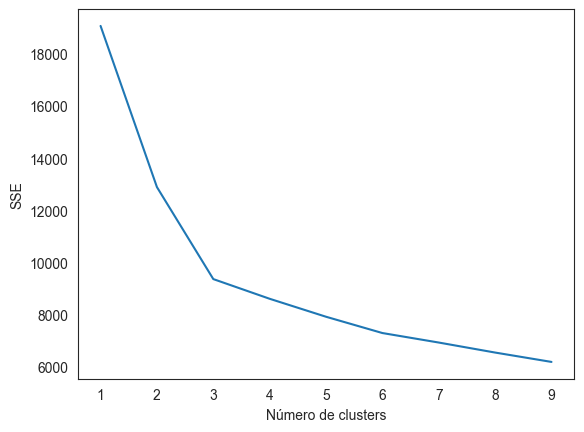

In [40]:
# Definindo um dicionário para os valores da métrica SSE
sse = {}

# Serão testados de 1 a 9 clusters e a métrica SSE será analisada para que seja possível escolher o melhor número de clusters
# Para isso, será utilizado o gráfico do cotovelo
for num_clusters in range (1,10):
    kmeans = KMeans(n_clusters = num_clusters, max_iter= 1000).fit(df_pca_final.loc[:, nomes_componentes])

# É importante notar que toda a análise de cluster será feita com base nos componentes principais constrúidos na primeira 
# parte do projeto

    # Adicionando número de clusters do loop no dicionário 'sse' como chaves e a métrica correspondente como valores 
    sse[num_clusters] = kmeans.inertia_

# Plotando chaves e valores do dicionário (número de clusters e sse referente a eles) 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values())) # Transformando dict_keys e dict_values em lista de valores para plotá-los
plt.xlabel("Número de clusters") # Definindo legenda para eixo x
plt.ylabel("SSE") # Definindo legenda para eixo y
plt.show()

Como é possível identificar pelo gráfico, quando o número de clusters passa de 2 para 3, observa-se intensa variação na métrica SSE, o que significa que os ganhos provenientes da adição de mais um cluster neste ponto são satisfatórios. Além disso, é válido pontuar que, apesar da maior variação na métrica SSE não estar compreendida nesse intervalo (e sim na passagem de 1 para 2 clusters), a partir do número de clusters igual a 3, a variação na métrica SSE causada pela adição de mais clusters acaba se tornando cada vez menor. Dessa forma, levando em consideração que um menor número de clusters corrobora para uma análise com maior nível de interpretabilidade, serão utilizados 3 clusters na segunda parte deste projeto.

In [41]:
# Vamos agora fitar o kmeans com o número de clusters escolhido (3)
kmeans = KMeans(n_clusters = 3, max_iter = 1000, random_state = 40).fit(df_pca_final.loc[:, nomes_componentes])

# Adicionando uma coluna que diz respeito a qual cluster cada indivíduo pertence
df_pca_final['Cluster'] = kmeans.labels_

# Visualizando novo DataFrame gerado (com informações relativas aos Clusters)
df_pca_final.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,1
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,0
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,2
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,1
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,2


In [42]:
# Observando clusters dos indivíduos
kmeans.labels_

array([1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0,

In [43]:
# Analiando centroides 
kmeans.cluster_centers_

array([[-3.48849845e+00, -3.91200832e+00,  1.35259023e-03,
        -2.54746462e-02, -1.04893614e-01],
       [ 4.82314353e+00, -1.73590358e-01,  2.61090894e-01,
        -8.41311457e-02, -3.96639111e-02],
       [-2.90701573e+00,  3.72889618e+00, -3.28091713e-01,
         1.28196550e-01,  1.43814440e-01]])

In [44]:
# Analisndo a composição de cada cluster com base nos centroides
centroides_df = pd.DataFrame(data = kmeans.cluster_centers_, columns = nomes_componentes)

# Visualizando DataFrame
centroides_df

,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro
0,-3.49,-3.91,0.00,-0.03,-0.10
1,4.82,-0.17,0.26,-0.08,-0.04
2,-2.91,3.73,-0.33,0.13,0.14


> Como é possível observar, o atributo cluster_centers_ mostra como cada cluster é caracterizado de acordo com os componentes principais gerados via PCA. 

1) Nesse sentido, percebe-se que o cluster de número 0 corresponde ao contrário dos "Workaholics" e dos que gostam de carros pequenos, revelando que estão presentes neste cluster os indivíduos que tem pouco cuidado com o dinheiro (gastam bastante) e que não gostam de carros apertados.
   
2) Por outro lado, o cluster 1 agrupa os indivíduos que tem muito cuidado com o dinheiro e enxergam mais valor no trabalho do que no pagamento.

3) Por fim, o cluster de número 2 possui indivíduos caracterizados pelo apreço a carros apertados e pela relativa falta de cuidado com o dinheiro.

## <a> Análise dos Clusters </a>

De posse dos clusters formados e da caracterização de cada um, vamos separar os indivíduos com base no cluster ao qual pertencem. Serão criados 3 DataFrames, um para cada cluster.

In [45]:
# Criando DataFrame para cluster 0
df_cluster_0 = df_pca_final.loc[df_pca_final['Cluster']==0]

# Visualizando DF
df_cluster_0.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
subjnumb,,,,,,,,,,,,,,
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,0
7,47,38,26,2,1,4,3,8,-3.95,-4.49,2.79,-0.14,-0.11,0
15,52,119,28,3,1,3,3,6,-6.21,-5.45,1.31,-0.02,-0.12,0
16,39,28,29,2,1,4,3,6,-3.66,-4.64,4.12,-2.77,-2.56,0
17,43,113,17,0,0,4,4,9,-4.10,-4.96,-5.54,-2.71,2.03,0


In [46]:
# Criando DataFrame para cluster 1
df_cluster_1 = df_pca_final.loc[df_pca_final['Cluster']==1]

# Visualizando DF 
df_cluster_1.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,1
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,1
8,29,39,16,1,0,2,2,4,4.29,-1.27,2.10,-2.66,0.53,1
10,26,26,11,0,0,2,3,3,8.11,1.87,-1.86,-1.12,-0.59,1
11,31,20,12,0,1,3,3,1,5.16,-2.38,2.59,-3.28,0.27,1


In [47]:
# Criando DataFrame para cluster 2 
df_cluster_2 = df_pca_final.loc[df_pca_final['Cluster']==2]

# Visualizando DF
df_cluster_2.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
subjnumb,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,2
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,2
6,43,94,16,0,0,3,5,2,-3.41,8.46,-3.38,-1.64,-1.34,2
9,38,129,20,1,0,3,2,5,-3.82,4.41,-0.15,1.17,1.07,2
12,43,136,17,0,0,3,1,3,-2.17,4.27,0.15,1.24,2.22,2


In [48]:
# Analisando distribuição de indivíduos por cluster
df_pca_final['Cluster'].value_counts()

Cluster
1    159
2    127
0    114
Name: count, dtype: int64

In [49]:
# Definindo variável value_counts
value_counts = df_pca_final['Cluster'].value_counts()

# Calculando percentuais
print(f"{round(value_counts[0]/(value_counts[0] + value_counts[1] + value_counts[2]) * 100, 2)}% dos indivíduos estão no cluster 0")

# Calculando percentuais
print(f"{value_counts[1]/(value_counts[0] + value_counts[1] + value_counts[2]) * 100}% dos indivíduos estão no cluster 1")

# Calculando percentuais
print(f"{(value_counts[2]/(value_counts[0]+value_counts[1]+value_counts[2]) * 100).round(2)}% dos indivíduos estão no cluster 2")

28.5% dos indivíduos estão no cluster 0
39.75% dos indivíduos estão no cluster 1
31.75% dos indivíduos estão no cluster 2


Como foi mostrado, a distribuição dos indivíduos (possíveis clientes) é bem equilibrada entre os clusters.

## <a> EDA Dos Clusters </a>

> Como fora demonstrado anteriormente, cada cluster é caracterizado por seu centróide, que corresponde à média das respostas para cada componente principal criado. Nesse sentido, o cluster 0 se refere aos indivíduos que têm pouco cuidado com dinheiro e que não gostam de carros apertados. Por outro lado, o cluster 1 diz respeito aos respondentes que têm bastante cuidado com o dinheiro e que valorizam mais o trabalho do que o pagamento. Por fim, os indivíduos que gostam de carros apertados estão concentrados no cluster de número 2.

> Dada a separação dos dados originais com base nos clusters a que pertencem cada um dos indivíduos, é possível relacionar os perfis dos indivíduos, de acordo com suas variáveis demográficas (que não foram utilizadas na construção dos clusters), com as caractéristicas que os enquadraram nos clusters a que estes pertencem. De forma mais clara, essa análise poderia ser construída, por exemplo, ao se comparar o número de filhos dos indivíduos que têm bastante cuidado com o dinheiro (cluster 1) com o número de filhos dos indivíduos que têm pouco cuidado e que não gostam de carros apertados (cluster 0).

> Dessa forma, valendo-se de recursos gráficos, por meio de uma análise exploratória de dados, é possível dispor de mais informações sobre os respondentes do questionário a fim de se construir uma campanha de marketing ainda mais aprofundada e assertiva. 

> Afim de tornar mais eficiente a exploração gráfica, vamos definir funções que automatizem alguns processos de construção de gráficos.

In [50]:
# Definindo função para plotar boxplots e comparar variaveis entre os clusters
def boxplot(var, label, titulo):
    '''
    Gera boxplots para a variável especificada a partir dos dataframes dos 3 clusters.

    Parâmetros:
    -> var (str): Variável a ser analisada.
    -> label (str): Legenda para o gráfico.
    -> titulo (str): Título do gráfico.
    '''

    # Setando estilo e criando subplots
    sns.set_style("dark")
    figura, axes = plt.subplots(1,3, sharey = True, figsize = (7,5))
    
    # Definindo as cores a serem usadas
    cores = ["#FF0000", "#33FFFF", "#008000"]
    
    # Definindo nomes a serem usados
    nomes = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2"}
    
    # Criando lista com DataFrames para usar iteração 
    clusters = [df_cluster_0, df_cluster_1, df_cluster_2]
    
    # Plotando boxplot
    for i in range(len(clusters)):
        sns.boxplot(data=(clusters[i]), y = f'{var}', ax = axes[i], color = cores[i])
    
    # Definindo rótulos dos eixos x de cada gráfico
    for i in range(len(nomes)):
        axes[i].set_xlabel(nomes[i])
    
    # Definindo legenda 
    axes[0].set_ylabel(f"{label}", color = 'grey', fontsize= 10)
    
    plt.suptitle(f"{titulo}", fontsize=15, color = 'k', fontweight = 'bold')
    plt.tight_layout()
    plt.show()

In [51]:
# Definindo função para plotar violinplots e comparar variaveis entre os clusters
def violinplot(var, label, titulo):
    '''
    Gera violinplots para a variável especificada a partir dos dataframes dos 3 clusters.

    Parâmetros:
    -> var (str): Variável a ser analisada.
    -> label (str): Legenda para o gráfico.
    -> titulo (str): Título do gráfico.
    '''

    # Setando estilo e criando subplots
    sns.set_style("dark")
    figura, axes = plt.subplots(1,3, sharey = True, figsize = (7,5))
    
    # Definindo as cores a serem usadas
    cores = ["#FF0000", "#33FFFF", "#008000"]
    
    # Definindo nomes a serem usados
    nomes = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2"}
    
    # Criando lista com DataFrames para usar iteração 
    clusters = [df_cluster_0, df_cluster_1, df_cluster_2]
    
    # Plotando violinplot
    for i in range(len(clusters)):
        sns.violinplot(data=(clusters[i]), y = f'{var}', ax = axes[i], color = cores[i], split=True, 
                       inner_kws=dict(box_width=10, whis_width=2, color=".2"))
    
    # Definindo rótulos dos eixos x de cada gráfico
    for i in range(len(nomes)):
        axes[i].set_xlabel(nomes[i])
    
    # Definindo legenda 
    axes[0].set_ylabel(f"{label}", color = 'grey', fontsize= 10)
    
    plt.suptitle(f"{titulo}", fontsize=15, color = 'k', fontweight = 'bold')
    plt.tight_layout()
    plt.show()

> Agora começaremos o processo de análise exploratória.

### <a> Idade entre os Clusters </a>

In [52]:
# Estatística descritiva simples dos indivíduos do Cluster 0
df_cluster_0.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,44.34,83.61,22.37,1.98,0.60,3.35,3.09,6.65,-3.49,-3.91,0.00,-0.03,-0.10,0.00
std,5.68,33.32,4.04,1.11,0.49,0.65,1.23,2.23,1.97,1.56,2.77,2.54,1.90,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,-7.18,-6.66,-7.18,-4.86,0.00
25%,40.25,59.25,19.25,1.00,0.00,3.00,2.00,5.00,-4.80,-5.18,-1.79,-1.64,-1.48,0.00
50%,44.00,79.00,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,-3.93,-0.13,-0.01,-0.15,0.00
75%,48.00,107.25,25.75,3.00,1.00,4.00,4.00,9.00,-2.08,-2.84,2.08,1.38,0.99,0.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,-0.04,7.07,6.62,5.26,0.00


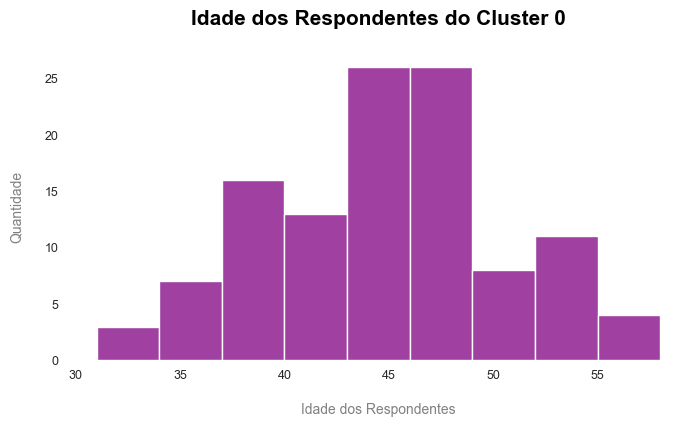

In [53]:
# Plotando histograma para visualizar distribuição de idades
histograma(dados = df_cluster_0, var = 'age', legenda = ("Idade dos Respondentes", "Idade dos Respondentes do Cluster 0"))

Como é possível observar, no cluster de número 0 existe uma grande concentração de indivíduos cujas idades estão presentes na faixa de 40 a 48 anos. 

In [54]:
# Estatística descritiva simples dos indivíduos do Cluster 1
df_cluster_1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,-0.17,0.26,-0.08,-0.04,1.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-5.24,-5.78,-5.29,-5.83,1.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.24,-1.47,-1.79,-1.50,1.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,-0.32,0.27,-0.22,-0.07,1.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.06,2.05,1.45,1.51,1.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,4.33,6.87,5.90,5.45,1.00


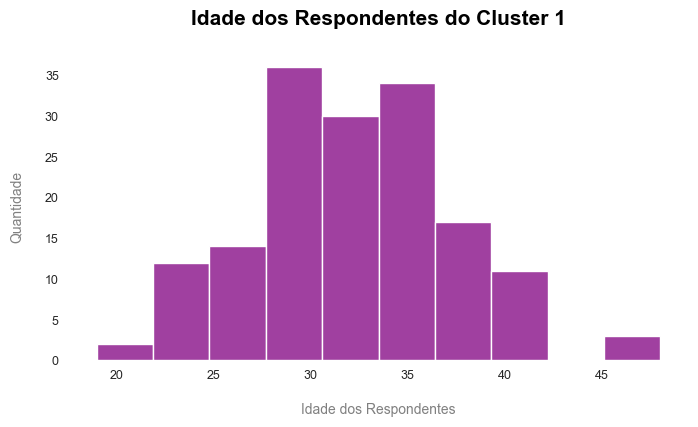

In [55]:
# Plotando histograma para visualizar distribuição de idades
histograma(dados = df_cluster_1, var = 'age', legenda = ("Idade dos Respondentes", "Idade dos Respondentes do Cluster 1"))

Por outro lado, existem indicativos de que os indivíduos do cluster 1 são mais jovens. Nesse sentido, é possível identificar que grande parte dos respondentes deste cluster se encontram na faixa etária de 28 a 26 anos. 

In [56]:
# Estatística descritiva simples do cluster 2
df_cluster_2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Workaholics,Carros_Pequenos,Família,Velozes,Carro_Caro,Cluster
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,46.10,103.57,18.46,1.22,0.56,3.26,3.06,4.39,-2.91,3.73,-0.33,0.13,0.14,2.00
std,6.00,43.61,3.53,0.99,0.50,0.66,1.19,2.54,1.85,1.58,2.64,2.41,2.02,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,-0.22,-6.20,-6.34,-4.31,2.00
25%,42.00,73.00,16.00,0.50,0.00,3.00,2.00,2.00,-4.12,2.77,-2.31,-1.62,-1.28,2.00
50%,46.00,95.00,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,3.68,-0.11,0.30,-0.03,2.00
75%,51.00,127.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.79,4.74,1.47,1.55,1.28,2.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,8.46,5.46,7.34,6.33,2.00


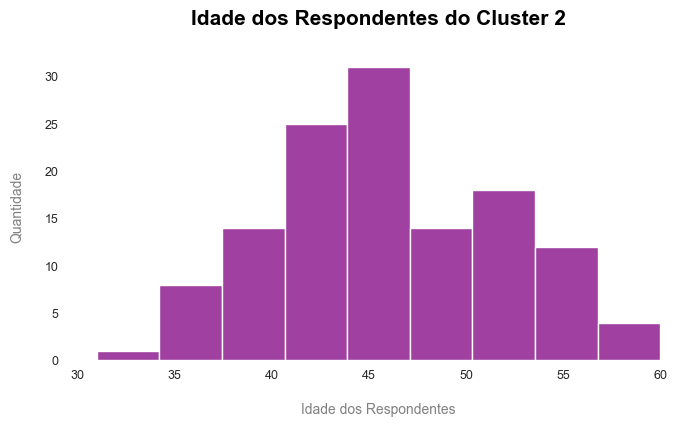

In [57]:
# Plotando histograma para visualizar distribuição de idades
histograma(dados = df_cluster_2, var = 'age', legenda = ("Idade dos Respondentes", "Idade dos Respondentes do Cluster 2"))

Dentre os 3 clusters analisados, percebe-se, aqui, respondentes com idade mais avançada, como é expresso pela mediana da idade deste cluster obtendo valor de 46 anos. 

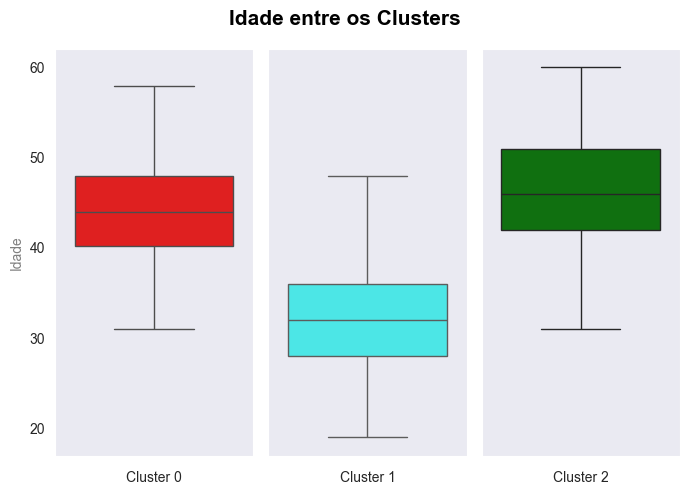

In [58]:
# Chamando a função para analisar a idade entre os clusters
boxplot('age', 'Idade', 'Idade entre os Clusters')

> Como o boxplot acima indica, de fato os respondentes do cluster 2 (indivíduos que gostam de carros apertados) possuem, no geral, idade mais avançada.

> O gráfico ainda permite evidenciar que os indivíduos que possuem mais cuidado com o dinheiro (cluster 1) são os mais jovens.

> Por outro lado, percebe-se que os indivíduos caracterizados por possuírem pouco cuidado com o dinheiro (cluster 0) estão num patamar intermediário no que diz respeito à faixa etária. 

### <a> Renda entre os Clusters </a>

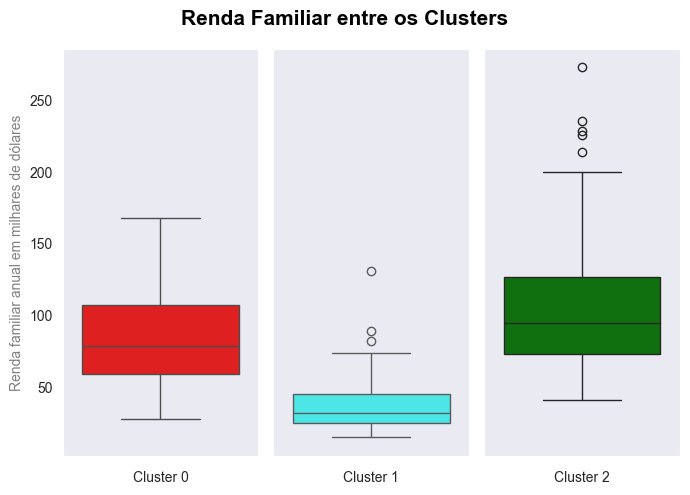

In [59]:
# Chamando função para analisar a renda entre os clusters
boxplot('income', 'Renda familiar anual em milhares de dólares', 'Renda Familiar entre os Clusters')

> Como é possível perceber, os indivíduos do Cluster 2 (que gostam de carros mais apertados) possuem nível mais elevado no que diz respeito à renda familiar. 
Por outro lado, enquanto os indivíduos do Cluster 0 estão num patamar intermediário, os respondentes do Cluster 1 (que possuem maior cuidado com o dinheiro) são os menos abastados.

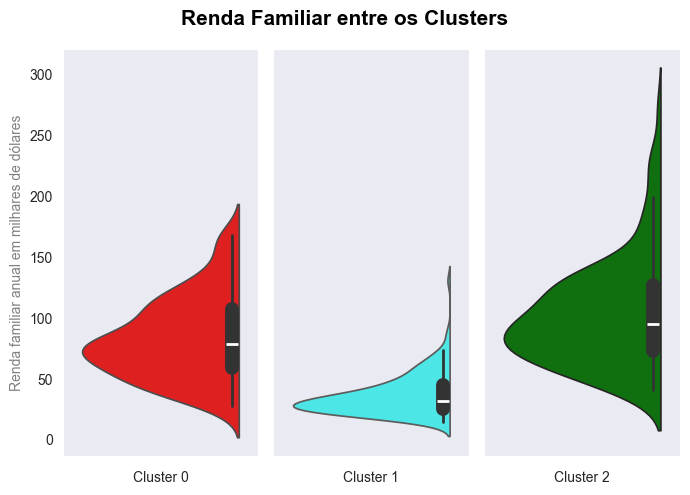

In [60]:
violinplot('income', 'Renda familiar anual em milhares de dólares', 'Renda Familiar entre os Clusters')

> Ao analisar as distribuições da renda familiar em cada cluster, com base no violinplot acima, é interessante analisar a situação das principais medidas de tendência central a fim de caracterizar cada distribuição.
>
> Como a variável em questão é a renda familiar, é esperado que as distribuições sejam assimétricas à direita, por haver maior concentração em valores mais baixos. 

In [61]:
# Criando DataFrame para média, moda e mediana da distribuição de Renda Familiar de cada Cluster
data = {'Média': [round(df_cluster_0['income'].mean(), 2), round(df_cluster_1['income'].mean(), 2), 
                 round(df_cluster_2['income'].mean(), 2)], 
       'Mediana': [round(df_cluster_0['income'].median(), 2), round(df_cluster_1['income'].median(), 2), 
                round(df_cluster_2['income'].median(), 2)], 
       'Moda': [round(df_cluster_0['income'].mode()[0], 2), round(df_cluster_1['income'].mode()[0], 2),
               round(df_cluster_2['income'].mode()[0], 2)]}

# Definindo como DataFrame
df_comparacao = pd.DataFrame(data)

# Definindo Índices
df_comparacao.index = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Mostrando
df_comparacao

,Média,Mediana,Moda
Cluster 0,83.61,79.00,70
Cluster 1,36.65,32.00,22
Cluster 2,103.57,95.00,80


> Como é possível perceber, o padrão de assimetria à direita é realmente encontrado. As distribuições de renda familiar são assimétricas à direita em todos os clusters, indicando que sempre há maior concentração de renda em valores anuais menores. Tal fato pode ser confirmado uma vez que:
>
* Para todos os Clusters, tem-se que Média > Mediana > Moda, o que caracteriza uma distribuição como Assimétrica à Direita.

### <a> Milhas entre os Clusters </a>

In [62]:
dicionario_dados['miles']

'Valor anual total conduzido por membros da família em milhares de milhas'

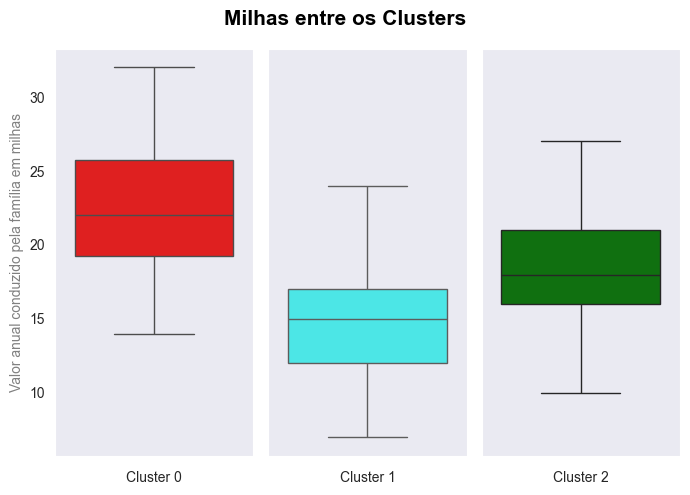

In [63]:
# Chamando função para analisar milhas entre os clusters
boxplot('miles', 'Valor anual conduzido pela família em milhas', 'Milhas entre os Clusters')

> De acordo com o boxplot acima, é possível perceber que, enquanto os indivíduos do Cluster 0 (que não possuem cuidado com o dinheiro que ganham) percorrem, anualmente, mais milhas que os indivíduos de outros clusters, os integrantes do Cluster de número 1 (que possuem bastante cuidado com o dinheiro que recebem) são os que percorrem uma menor distância com seus veículos.
>
> Já no que diz respeito aos indivíduos que gostam de carros apertados (Cluster 2), observa-se um valor intermediário no que tange às milhas percorridas. 

### <a> Número de Filhos entre os Clusters </a>

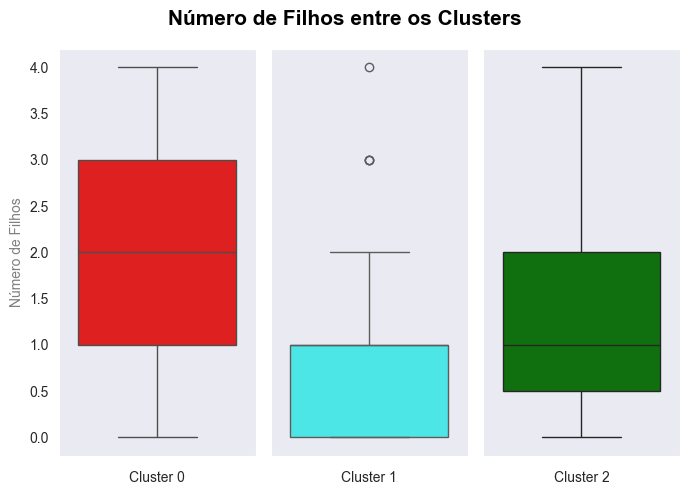

In [64]:
# Chamando função para analisar numero de filhos entre os clusters
boxplot('numkids', 'Número de Filhos', 'Número de Filhos entre os Clusters')

> De acordo com o boxplot acima, percebe-se que os indivíduos que não cuidam muito bem do dinheiro são os que possuem mais filhos (Cluster 0).
> 
> Nesse sentido, também é possível identificar que os indivíduos que cuidam bem do dinheiro (Cluster 1), geralmente possuem menos filhos.
>
> Por sua vez, os indivíduos do Cluster 2 (que gostam de carros apertados) estão num patamar intermediário quanto ao número de dependentes.

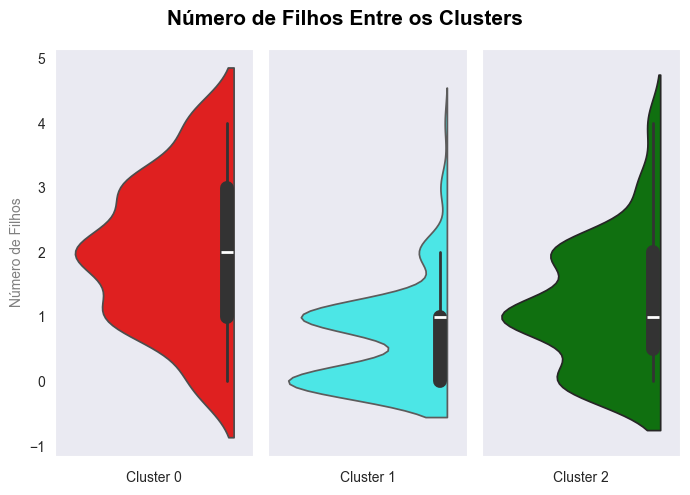

In [65]:
violinplot('numkids', 'Número de Filhos', 'Número de Filhos Entre os Clusters')

> Ao analisar as distribuições do número de filhos dos indivíduos de cada cluster, é possível perceber que pouquíssimos indivíduos do Cluster 1 possuem número de filhos superior a 2.

In [66]:
# Verificando moda, média e mediana dos número de filhos dos indivíduos do cluster 0
info = {'Média': [df_cluster_0['numkids'].mean()], 'Mediana': [df_cluster_0['numkids'].median()],
        'Moda': [df_cluster_0['numkids'].mode()[0]]}

# Definindo DataFrame
dfinfo = pd.DataFrame(info)

# Setando Index
dfinfo.index = ['Cluster 0']

# Mostrando
dfinfo

,Média,Mediana,Moda
Cluster 0,1.98,2.00,2


> Além disso, também é possível perceber que a distribuição do número de filhos dos indivíduos do Cluster 0 se assemelha a uma distribuição normal, (embora seja necessário utilizar testes de aderência para verificar essa questão) uma vez que os valores da média, moda e mediana são bastante próximos. 

### <a> Distribuição do Sexo entre os Clusters </a>

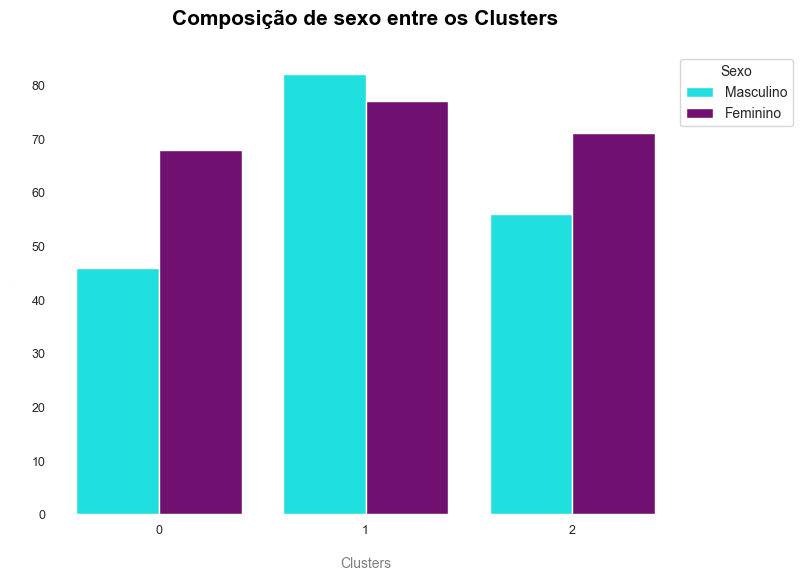

In [67]:
# Definindo cores para a paleta
color = ['#00FFFF', '#800080'] # Cores ciano e roxo 
sns.set_style("white") # Setando estilo do seaborn
plt.figure(figsize=(8,6)) # Definindo tamanho do objeto figure    
sns.countplot(df_pca_final, x = 'Cluster', palette = color, hue = "female") # Plotando gráfico
sns.despine(bottom = True, left = True) # Retirando bordas
plt.ylabel("[]", color = 'grey', fontsize = 0, labelpad = 15) # Tirando legenda do eixo y
plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
plt.xlabel("Clusters", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
plt.title("Composição de sexo entre os Clusters", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold') # Colocando título
plt.legend(title="Sexo", labels=["Masculino", "Feminino"], loc='upper right', bbox_to_anchor=(1.2, 1))

# Mostrando
plt.show()

> Como é possível perceber, nos clusters 0 e 2 há uma maior quantidade de mulheres, ao passo que no cluster de número 1 a quantidade de homens é levemente maior que a de mulheres.

### <a> Clusters e MVLIKING - Histogramas </a>

In [71]:
# Importando plotly
import plotly.express as px

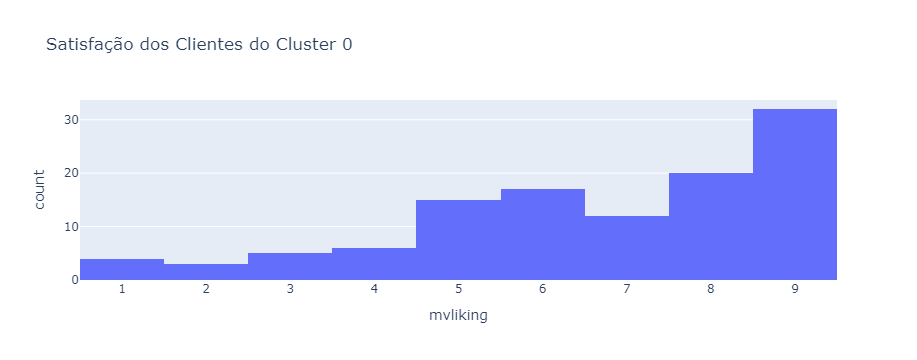

In [76]:
# Gráfico para mostrar mvliking no cluster 0
fig = px.histogram(data_frame=df_cluster_0, x = 'mvliking', title= "Satisfação dos Clientes do Cluster 0")
fig.show()

A partir da análise do Cluster 0, é possível perceber que a maioria dos indivíduos que o compõem ficaram satisfeitos com o conceito da microvan. Como o gráfico aponta, a maioria dos indivíduos deste cluster atribuíram valores altos para a pergunta do questionário que se referia ao quanto eles gostaram do conceito da microvan.

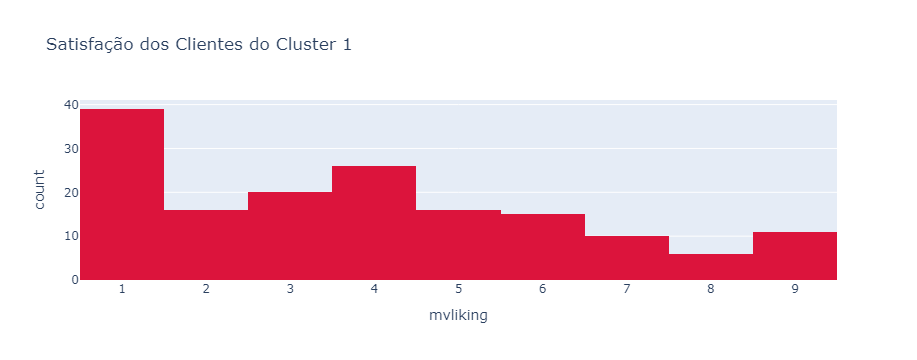

In [90]:
# Gráfico para mostrar mvliking no cluster 1
fig1 = px.histogram(data_frame=df_cluster_1, x = 'mvliking', title= "Satisfação dos Clientes do Cluster 1", 
                   color_discrete_sequence=['crimson'])
fig1.show()

No que diz respeito ao Cluster 1, se observa o contrário do padrão do Cluster 0. Aqui, percebe-se que a maioria dos indivíduos não gostaram do conceito da microvan.

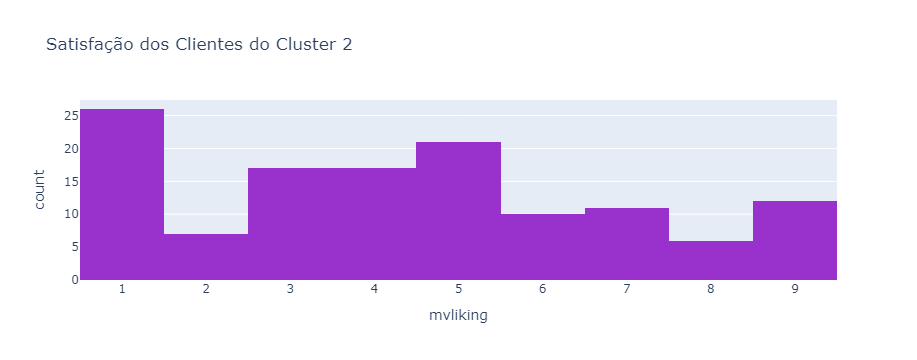

In [89]:
# Gráfico para mostrar mvliking no cluster 2
fig2 = px.histogram(data_frame=df_cluster_2, x = 'mvliking', title= "Satisfação dos Clientes do Cluster 2", 
                   color_discrete_sequence=['darkorchid'])
fig2.show()

Já no que diz respeito ao Cluster 2, observa-se que não há definição clara. No entanto, o histograma indica que o contingente de indivíduos que responderam no intervalo de 1 a 4 é superior ao conjunto que respondeu de 5 a 9. Dessa forma, observa-se que tal cluster também não aparenta ser o melhor para divulgar o produto em questão (microvan).

### <a> Clusters e MVLIKING - Boxplots (Comparação) </a>

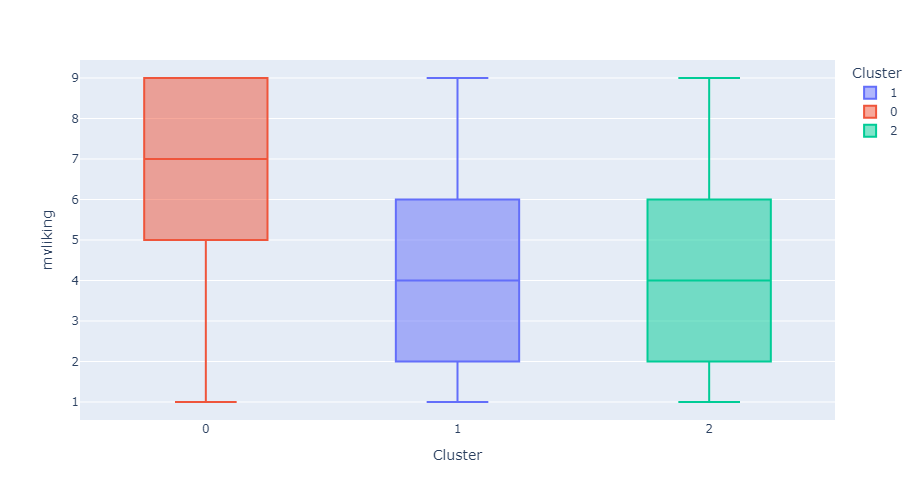

In [109]:
# Usando gráfico de boxplot para comparar mvliking entre os clusters
fig3 = px.box(data_frame=df_pca_final, x='Cluster', y='mvliking', color='Cluster')
fig3.update_layout(
    width=700,   # Largura do gráfico
    height=500   # Altura do gráfico
)
fig3.show()

A partir da análise da mediana da variável 'mvliking' entre os clusters, é possível identificar, de fato, uma maior aceitação do conceito da microvan entre os indivíduos do Cluster 0.

### <a> Analisando Correlação - Features Demográficas e MVLIKING </a>

In [110]:
# Visualizando todas as features
df_pca_final.columns

# As features que precisamos são as 8 primeiras

Index(['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle',
       'mvliking', 'Workaholics', 'Carros_Pequenos', 'Família', 'Velozes',
       'Carro_Caro', 'Cluster'],
      dtype='object')

In [111]:
# Separando DataFrame com apenas as features demográficas e a feature 'mvliking'
df_demografico = df_pca_final.iloc[:, :8]

In [113]:
# Visualizando DataFrame
df_demografico.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


> ### Analisando Estrutura de Correlação

In [116]:
# Criando DataFrame que mostra a correlação das variáveis
df_correlacao = df_demografico.corr()

In [117]:
# Visualizando DataFrame
df_correlacao

,age,income,miles,numkids,female,educ,recycle,mvliking
age,1.00,0.74,0.53,0.37,0.12,0.64,-0.14,0.33
income,0.74,1.00,0.34,0.21,-0.02,0.49,-0.12,0.22
miles,0.53,0.34,1.00,0.73,0.41,0.44,-0.10,0.21
numkids,0.37,0.21,0.73,1.00,0.34,0.18,-0.26,0.20
female,0.12,-0.02,0.41,0.34,1.00,0.22,-0.04,-0.25
educ,0.64,0.49,0.44,0.18,0.22,1.00,0.15,0.17
recycle,-0.14,-0.12,-0.10,-0.26,-0.04,0.15,1.00,-0.12
mvliking,0.33,0.22,0.21,0.20,-0.25,0.17,-0.12,1.00


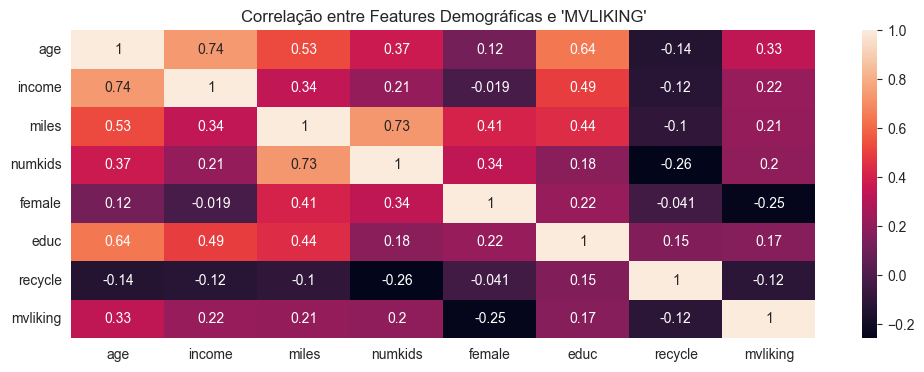

In [132]:
# Plotando heatmap da correlação entre as features demográficas e a feature 'mvliking'
plt.figure(figsize=(12,4))
sns.heatmap(data = df_correlacao, annot = True)
plt.title("Correlação entre Features Demográficas e 'MVLIKING'")
plt.show()

Dentre todas as features demográficas, 'age' e 'female' demonstraram estar mais relacionadas ao quanto o cliente gostou do conceito da microvan. 

De forma mais clara, o heatmap acima permite identificar que há uma relação positiva de baixa intensidade entre a idade e a feature 'mvliking', o que significa que existe um indicativo de que pessoas mais velhas tendem a gostar mais do conceito da microvan, mesmo que essa tendência não seja tão forte. 

Por outro lado, é possível identificar uma relação negativa, também de intensidade baixa, entre o sexo do indivíduo e a feature 'mvliking'. Tal fato demonstra que homens tendem a gostar mais do conceito da microvan se comparados às mulheres, mesmo que essa tendência não seja tão forte.

> ### Filtrando Cluster 

Tendo em vista a relação que as variáveis 'age' e 'female' apresentaram com a variável 'mvliking', é interessante aplicar um filtro nos clusters, a fim de perceber como tais variáveis afetam o quanto o cliente gostou do conceito da microvan.

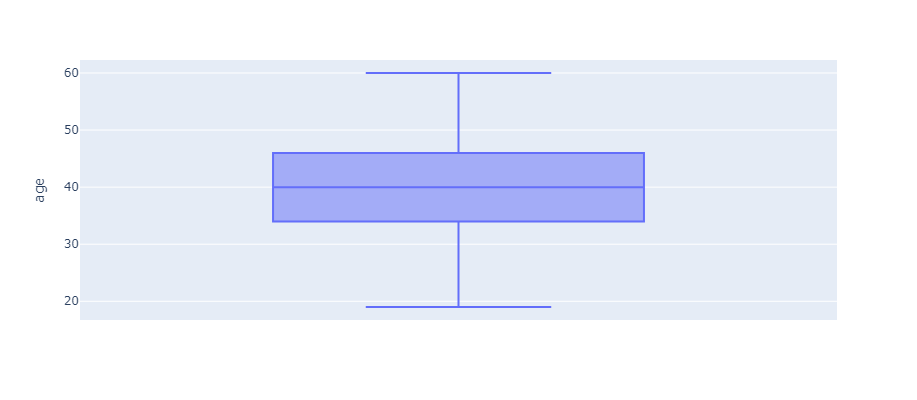

In [149]:
# Observando boxplot da variável age para identificar sua mediana e seus outros quartis
fig4 = px.box(data_frame=df_pca_final, y='age')
fig4.update_layout(
    width=500,   # Largura do gráfico
    height=400   # Altura do gráfico
)
fig4.show()

Como o boxplot aponta, a mediana da idade de todos os indivíduos é igual a 40 anos. Isso significa que essa idade divide igualmente a quantidade de respondentes do questionário, de tal forma que 50% tem 40 anos ou menos e os outros 50% possuem 40 anos ou mais.

Nesse sentido, dada a constatação de que a idade está, em certa medida, correlacionada com o quanto o cliente gostou do conceito da microvan, vamos aplicar um filtro de idade (usando a mediana encontrada) para visualizar como a variável 'mvliking' se comporta nos diferentes clusters.

Além disso, levando em consideração que foi identificada, também, uma correlação (neste caso, negativa) entre o sexo do indivíduo e o quanto ele gostou do conceito da microvan, é importante aplicar um filtro de sexo.

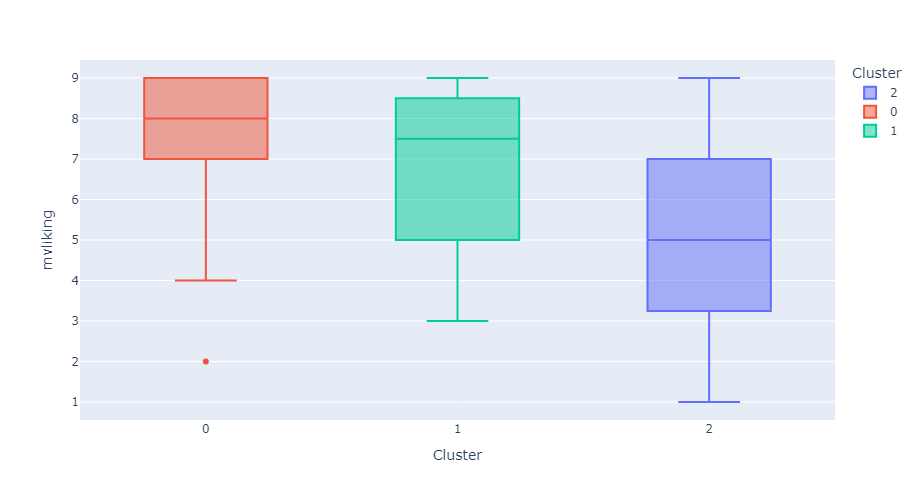

In [168]:
# Observando boxplots a partir de um filtro na idade para indivíduos do sexo masculino
fig5 = px.box(data_frame=df_pca_final.loc[(df_pca_final['age'] >= 40) & (df_pca_final['female'] == 0), :], 
              x = 'Cluster', y='mvliking', color= 'Cluster')
fig5.update_layout(
    width=800,   # Largura do gráfico
    height=500   # Altura do gráfico
)
fig5.show()

In [189]:
# Calculando a porcentagem de respondentes homens, com 40 anos ou mais, do Cluster 0
print(f"{len(df_pca_final.loc[(df_pca_final['age'] >= 40) & (df_pca_final['female'] == 0) & (df_pca_final['Cluster'] == 0)])/len(df_pca_final) * 100}% dos respondentes são homens de 40 anos ou mais, pertencentes ao Cluster 0.") 

8.5% dos respondentes são homens de 40 anos ou mais, pertencentes ao Cluster 0.


Após a segmentação dos indivíduos, selecionando apenas aqueles do sexo masculino e que possuem 40 anos ou mais, percebeu-se que as medianas da variável 'mvliking' foram alteradas significativamente.

> No que diz respeito ao Cluster 0, a mediana da variável 'mvliking' passou de 7 para 8. 
>
> No Cluster 1, a mediana passou de 4 para 7,5.
>
> Por fim, no Cluster 2, a mediana passou de 4 para 5.

A partir disso, é possível compreender que, de fato, as variáveis sexo e idade estão correlacionadas com o quanto o cliente gostou do conceito da microvan. Diante disso, é possível estabelecer uma campanha de marketing mais assertiva, que possa ser aplicada diretamente no grupo, dentre o respondentes, que é mais apto a comprar a microvan.

É importante destacar, também, que o Cluster 0, o qual havia se demonstrado como sendo o que continha a maior quantidade de indivíduos mais propensos a comprar a microvan, possui menor variação no que diz respeito aos valores que seus indivíduos atribuíram à variável 'mvliking'. Isso significa que a campanha de marketing será mais assertiva, de fato, neste Cluster.

## <a> Conclusão </a>

> Este projeto teve como objetivo aplicar técnicas de redução de dimensionalidade para construir uma segmentação de clientes com base no aprendizado não supervisionado, isto é, por meio da utilização de técnicas de clusterização.
> A análise construída possibilita a execução de uma campanha de marketing mais assertiva, de forma a tornar seu impacto mais eficiente. Tal fato é decorrente da identificação dos perfis de consumidor, com base na criação de clusters e na atribuição de cada consumidor a um cluster específico. A partir disso, é possível obter um direcionamento mais inteligente no que diz respeito a aplicação dos recursos destinados à campanha de marketing.
>
> Com base neste projeto, foi demonstrado que clientes do Cluster 0 são mais propensos a comprar a microvan. Os indivíduos deste cluster são categorizados por terem pouco cuidado com dinheiro, bem como por sua aversão à carros pequenos. Além disso, os indivíduos do Cluster 0, no geral, possuem mais filhos e percorrem mais milhas por ano, se comparados aos indivíduos dos outros clusters. Por outro lado, o nível de renda familiar e a idade dos indivíduos do Cluster 0 estão num patamar intermediário em relação aos dois outros clusters construídos, sendo o Cluster 2 caracterizado por possuir os indivíduos com idade mais avançada e maior renda familiar.  
>
> De forma conclusiva, além de identificar os indivíduos mais propensos a comprar a microvan (com base em seu cluster), após aplicar filtros de idade e sexo nos clusters, percebeu-se que homens de 40 anos ou mais são os mais propensos a comprar a microvan. Sendo assim, a junção das duas informações permite asseverar que os homens de 40 anos ou mais, pertencentes ao Cluster 0 (correspondente aos indivíduos que possuem aversão a carros pequenos e pouco cuidado com dinheiro), são, de fato, os mais suscetíveis a compra da microvan. Dessa forma, a campanha de marketing deve ser direcionada especialmente a eles. No entanto, caso não haja substancial restrição de recursos para tal campanha, é possível, também, aplicá-la a indivíduos do Cluster 1 que sejam do sexo masculino e que possuam 40 anos ou mais. 